In [1]:
import numpy as np
from tensorflow.keras.datasets import mnist
from core.mlp import MLP
from core.activations import Fun
from core.losses import LossFun


In [2]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Preprocess: flatten and normalize to [0,1]
x_train = x_train.reshape(-1, 28*28).astype(np.float32) / 255.0
x_test = x_test.reshape(-1, 28*28).astype(np.float32) / 255.0

# One-hot encode labels
def to_one_hot(y, num_classes=10):
    oh = np.zeros((y.shape[0], num_classes), dtype=np.float32)
    oh[np.arange(y.shape[0]), y] = 1.0
    return oh

y_train_oh = to_one_hot(y_train)
y_test_oh = to_one_hot(y_test)

# Validation split
X_train, X_val = x_train[:-10000], x_train[-10000:]
Y_train, Y_val = y_train_oh[:-10000], y_train_oh[-10000:]


In [14]:
# Define and train MLP

np.random.seed(42)

layer_sizes = [784, 256, 128, 64, 32, 10]
activations = [Fun.ReLU, Fun.ReLU, Fun.ReLU, Fun.ReLU, Fun.Softmax]
mlp = MLP(layer_sizes, activations, LossFun.CrossEntropy)
train_loss, val_loss, weight_hist = mlp.train(
    X_train, Y_train, X_val, Y_val, epochs=500, learning_rate=0.1, print_loss=True
)

Epoka 50/500, błąd treningowy: 0.870828, walidacyjny: 0.815345
Epoka 100/500, błąd treningowy: 0.524446, walidacyjny: 0.471084
Epoka 150/500, błąd treningowy: 0.354372, walidacyjny: 0.313934
Epoka 200/500, błąd treningowy: 0.276871, walidacyjny: 0.256914
Epoka 250/500, błąd treningowy: 0.240883, walidacyjny: 0.226158
Epoka 300/500, błąd treningowy: 0.216818, walidacyjny: 0.206049
Epoka 350/500, błąd treningowy: 0.199493, walidacyjny: 0.190628
Epoka 400/500, błąd treningowy: 0.179904, walidacyjny: 0.175244
Epoka 450/500, błąd treningowy: 0.164802, walidacyjny: 0.163517
Epoka 500/500, błąd treningowy: 0.151956, walidacyjny: 0.153894


In [15]:
y_pred_test = mlp.predict(x_test)
test_acc = (np.argmax(y_pred_test, axis=1) == y_test).mean()
print(f'Test accuracy: {test_acc:.4f}')

Test accuracy: 0.9526


In [16]:
from datetime import datetime
import os

SAVE_DIR = "saves"
INFO_FILE = "info.txt"
save_name = f"mlp_save_{datetime.now().strftime('%Y%m%d_%H%M%S')}.pkl"

with open(os.path.join(SAVE_DIR, INFO_FILE), "a") as f:
    f.write(f"Test accuracy: {test_acc:.4f}\t{save_name}\t{layer_sizes}\t{activations}\n")

mlp.save(os.path.join(SAVE_DIR, save_name))

In [17]:
# Load model back and re-evaluate
from core.mlp import MLP
mlp2 = MLP.load(os.path.join(SAVE_DIR, save_name))
y_pred_test2 = mlp2.predict(x_test)
test_acc2 = (np.argmax(y_pred_test2, axis=1) == y_test).mean()
print(f'Reloaded test accuracy: {test_acc2:.4f}')


Reloaded test accuracy: 0.9526


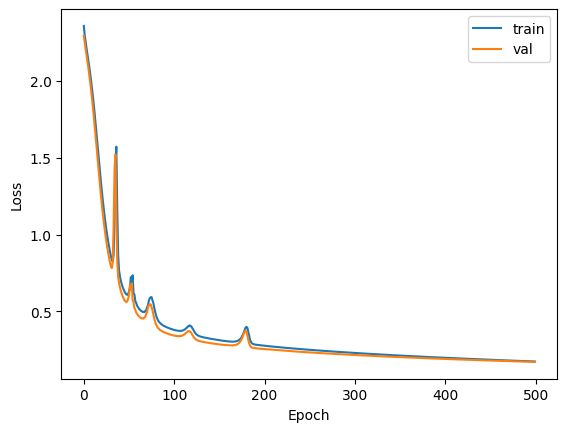

In [7]:
# Plot losses
import matplotlib.pyplot as plt
plt.plot(train_loss, label='train')
plt.plot(val_loss, label='val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()
